# Sheridan Kamal

## DATA 73500 - Assignment 5

### Purpose
In this notebook, we will be scraping data from the cutcovidnotcuny hashtag on twitter and visualizing how many times the tweets were retweeted with the hashtag and what language the tweets were written in. I chose this hashtag because of the talk of cutting budgets to CUNY schools, which will cause layoffs of adjunct professors, tuition hikes, as well as less course offerings which could impact students' ability to graduate.

### Data
The data is scraped from twitter using the twitter api and from the cutcovidnotcuny hashtag.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sb
import twitter as tw
import json
import math
import collections as cl
import matplotlib.pyplot as plt
import twitter as tw

In [2]:
CONSUMER_KEY = 'GDzHFRHpXG8GmazEa686SWrW8'
CONSUMER_SECRET = 'ugtGSyqQZWLxehCCJu7fBQxPquWai1grAaPVANeOC0EMZSUvF1'
OAUTH_TOKEN = '62099456-hWeDi3BLYTm6is402uqrMYUcdhZJD2DmVpUfDdiAw'
OAUTH_TOKEN_SECRET = 'nvys4S2sORvS13iWbQhW2QRZ5KXaJze5u8T5UlJVhdJkT'

auth = tw.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = tw.Twitter(auth=auth)

In [3]:
htag = '%23cutcovidnotcuny'
n = 25000
cuny = twitter_api.search.tweets(q=htag, count=n)
cuny_statuses = cuny['statuses']
cuny_df = pd.read_json(json.dumps(cuny_statuses))
cuny_df.head()

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,possibly_sensitive,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,extended_entities
0,2020-05-18 20:54:54+00:00,1262486847109902338,1262486847109902336,nygovcuomo #cutcovidnotcuny #makebillionairesp...,False,"{'hashtags': [{'text': 'cutcovidnotcuny', 'ind...","{'iso_language_code': 'und', 'result_type': 'r...","<a href=""http://instagram.com"" rel=""nofollow"">...",NaN,NaN,...,0,False,False,0.0,und,NaN,NaN,NaN,NaN,NaN
1,2020-05-18 20:52:23+00:00,1262486213841256449,1262486213841256448,"RT @pfn37_phil: Hey @NYGovCuomo, I'm an associ...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,0,False,False,NaN,en,{'created_at': 'Wed May 13 12:52:04 +0000 2020...,NaN,NaN,NaN,NaN
2,2020-05-18 20:52:01+00:00,1262486121440841729,1262486121440841728,nygovcuomo #cutcovidnotcuny #makebillionairesp...,False,"{'hashtags': [{'text': 'cutcovidnotcuny', 'ind...","{'iso_language_code': 'und', 'result_type': 'r...","<a href=""http://instagram.com"" rel=""nofollow"">...",NaN,NaN,...,0,False,False,0.0,und,NaN,NaN,NaN,NaN,NaN
3,2020-05-18 20:51:04+00:00,1262485879228182528,1262485879228182528,RT @PSC_CUNY: #FundCUNYNow #CutCovidnotCUNY #M...,False,"{'hashtags': [{'text': 'FundCUNYNow', 'indices...","{'iso_language_code': 'und', 'result_type': 'r...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,0,False,False,NaN,und,{'created_at': 'Mon May 18 20:49:46 +0000 2020...,1.262431e+18,1.262431e+18,NaN,NaN
4,2020-05-18 20:50:19+00:00,1262485690547347457,1262485690547347456,nygovcuomo #cutcovidnotcuny #makebillionairesp...,False,"{'hashtags': [{'text': 'cutcovidnotcuny', 'ind...","{'iso_language_code': 'und', 'result_type': 'r...","<a href=""http://instagram.com"" rel=""nofollow"">...",NaN,NaN,...,0,False,False,0.0,und,NaN,NaN,NaN,NaN,NaN


In [4]:
cuny_df.columns

Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities',
       'metadata', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'is_quote_status',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted',
       'possibly_sensitive', 'lang', 'retweeted_status', 'quoted_status_id',
       'quoted_status_id_str', 'quoted_status', 'extended_entities'],
      dtype='object')

In [5]:
cuny_df['retweet_count'].describe()

count    100.000000
mean      11.170000
std       12.746998
min        0.000000
25%        2.750000
50%        8.000000
75%       15.000000
max       62.000000
Name: retweet_count, dtype: float64

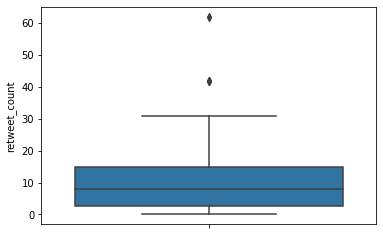

In [6]:
sb.boxplot(y='retweet_count', hue='retweeted_status', data=cuny_df)

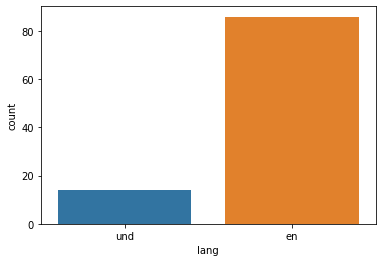

In [7]:
sb.countplot(x='lang', data=cuny_df)